**Random Sample Imputation**

Aim : Random Sample imuptation consists of taking random observation from dataset and we use this observation to replace the NaN values

When to use??

when data is MCAR

In [43]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [44]:
import pandas as pd
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [45]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [46]:
# to show the percentage of null values
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [47]:
df['Age'].isnull().sum()

np.int64(177)

In [48]:
#dropping NaN values and getting a random value
df['Age'].dropna().sample()

,Age
429,32.0


In [49]:
#for .sample() we are getting only one sample for all the 177 records so we put a condition in the .sample() to get 177 random samples same as
#  df['Age'].dropna().sample(177,random_state=0)
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

,Age
423,28.00
177,50.00
305,0.92
292,36.00
889,26.00
...,...
539,22.00
267,25.00
352,15.00
99,34.00


In [50]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [51]:
def impute_nan(df,variable,median):
  df[variable+"_median"] = df[variable].fillna(median)
  df[variable+"_random"] = df[variable]
  # random sample to fill the NaN values
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  # to merge the random samples with the existing nan values pandas need to have the same index as the other
  random_sample.index = df[df[variable].isnull()].index
  # .loc(row_name,column_name) wherever there are null fill with random_sample
  df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [52]:
impute_nan(df,'Age',df.Age.median())

In [53]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

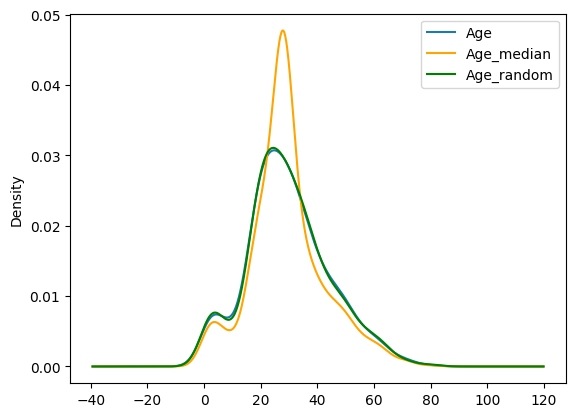

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='orange')
df['Age_random'].plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


This concludes that Random sample imputation is superior than Mean/Median/Mode imputation

there is less distortion in the variance

note-In every case Randomness wont work this is a disadvantage

**Capturing NaN values with a new feature**

It works well with if the data MCAR

In [56]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (3).csv


In [57]:
import pandas as pd
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [58]:
import numpy as np
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0)
df

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [59]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Advantages

Easy to implement

Captures the importance of missing values

Disadvantages

Creating Additional Features(Curse of Dimensionality)

**End of Distribution Imputation**

In [60]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (4).csv


In [61]:
import pandas as pd
df = pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

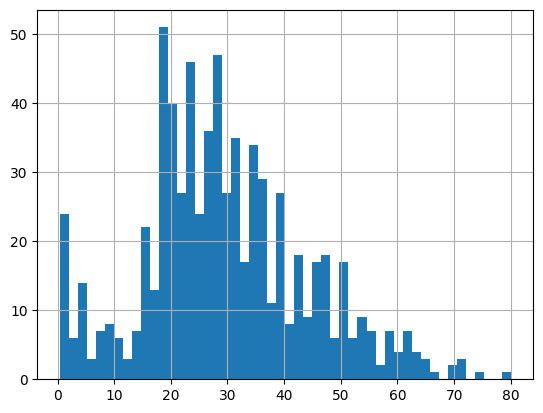

In [62]:
df.Age.hist(bins=50)

In [63]:
df.Age.mean() #it is the central value of the normal distribution graph

np.float64(29.69911764705882)

In [64]:
#aim of this method is to find the value after 3*std in the graph
extreme = df.Age.mean()+3*df.Age.std()

In [65]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_distribution"] = df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [66]:
impute_nan(df,'Age',df.Age.median(),extreme)

/tmp/ipython-input-3772566218.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(median,inplace=True)


In [67]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [68]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0
Age_end_distribution,0


In [70]:
import seaborn as sns

<Axes: xlabel='Age'>

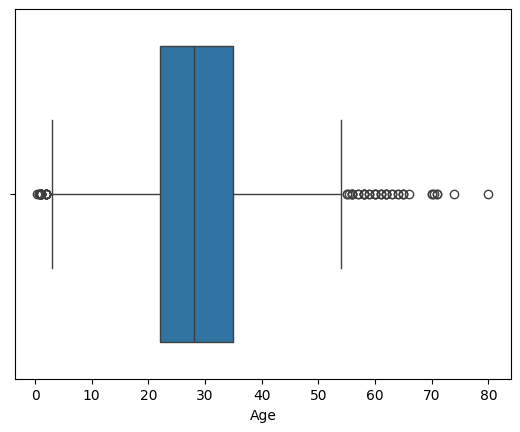

In [72]:
sns.boxplot(x='Age',data=df)

<Axes: xlabel='Age_end_distribution'>

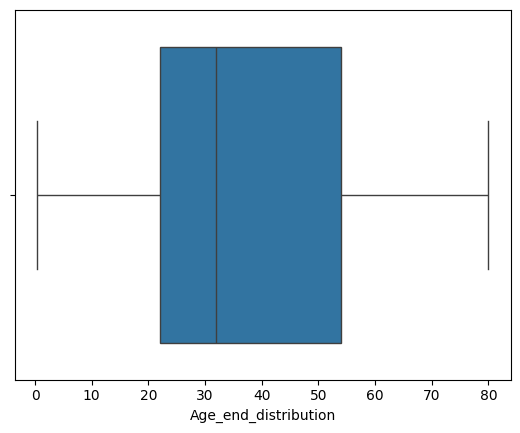

In [73]:
sns.boxplot(x='Age_end_distribution',data=df)

<Axes: >

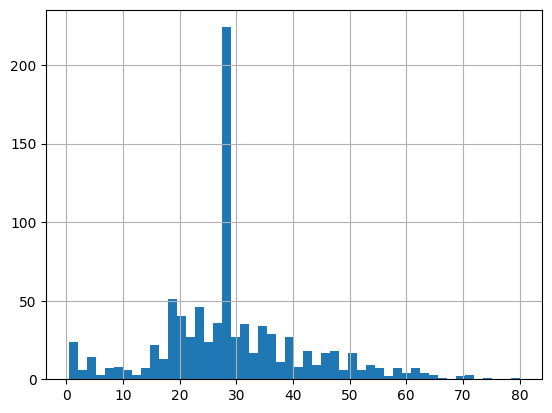

In [74]:
df['Age'].hist(bins=50)

<Axes: >

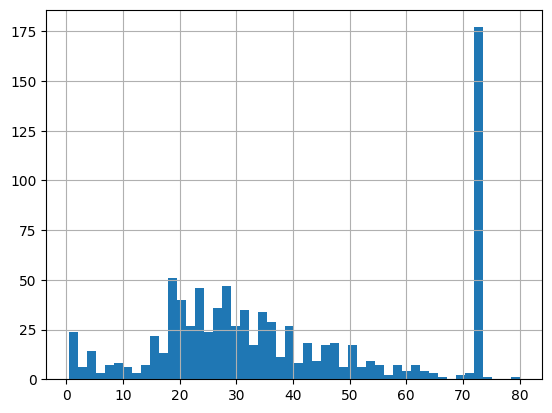

In [75]:
df['Age_end_distribution'].hist(bins=50)